## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Datasets

In [2]:
migration_df = pd.read_csv("datasets/migration/db.csv")


In [3]:
migration_df = migration_df[[
    "SPECIFICATION: Specification",         # Location
    "POP_MOVEMENT: Population Movement",    # Type
    "TIME_PERIOD: Time period",             # Year
    "OBS_VALUE",                            # Value
]]

# Rename columns to make it easier to work with
migration_df.columns = ["location", "type", "year", "value"]

display(migration_df.dtypes)
display(migration_df.head())

# How many empty values are in the dataset?
display(migration_df.isnull().sum())
# Which rows have empty values?
display(migration_df[migration_df.isnull().any(axis=1)])


location     object
type         object
year          int64
value       float64
dtype: object

,location,type,year,value
0,CM10008: Mondercange,M001: Arrivals,1990,366.0
1,CM10008: Mondercange,M001: Arrivals,1991,479.0
2,CM10008: Mondercange,M001: Arrivals,1992,535.0
3,CM10008: Mondercange,M001: Arrivals,1993,486.0
4,CM10008: Mondercange,M001: Arrivals,1994,453.0


location     0
type         0
year         0
value       29
dtype: int64

,location,type,year,value
539,CM12007: Lintgen,M003: Net migration,2001,NaN
613,CM02009: Schieren,M003: Net migration,2009,NaN
710,CM08002: Dalheim,M003: Net migration,2007,NaN
1226,CM12003: Fischbach,M003: Net migration,1995,NaN
1354,CM07006: Manternach,M003: Net migration,1991,NaN
2702,CM02010: Vallée de l'Ernz,M003: Net migration,2019,NaN
3457,CM05004: Kiischpelt,M003: Net migration,2015,NaN
4029,CM12002: Colmar-Berg,M003: Net migration,1993,NaN
4035,CM12002: Colmar-Berg,M003: Net migration,1999,NaN
4534,CM11011: Weiler-la-Tour,M003: Net migration,2003,NaN


In [4]:
# After observation, we can see that the empty values in net migration are actually 0
# We can fill these empty values with 0
migration_df["value"] = migration_df["value"].fillna(0)

display(migration_df.isnull().sum())

location    0
type        0
year        0
value       0
dtype: int64

## Some Plotting

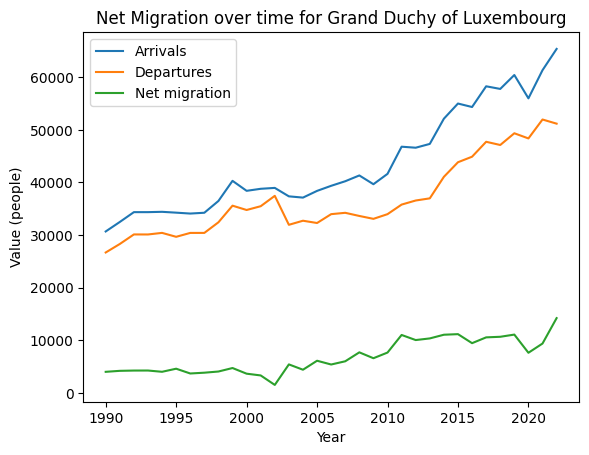

In [5]:
# Plot the net migration over time for the Grand Duchy of Luxembourg
luxembourg_migration = migration_df[migration_df["location"] == "LU: Grand Duchy of Luxembourg"]

# sns.set_theme(style="darkgrid", palette="colorblind")
for label in sorted(luxembourg_migration["type"].unique()):
    sns.lineplot(data=luxembourg_migration[luxembourg_migration["type"] == label],
                 x="year",
                 y="value",
                 label=label.split(": ")[1])

plt.title("Net Migration over time for Grand Duchy of Luxembourg")
plt.xlabel("Year")
plt.ylabel("Value (people)")
plt.show()


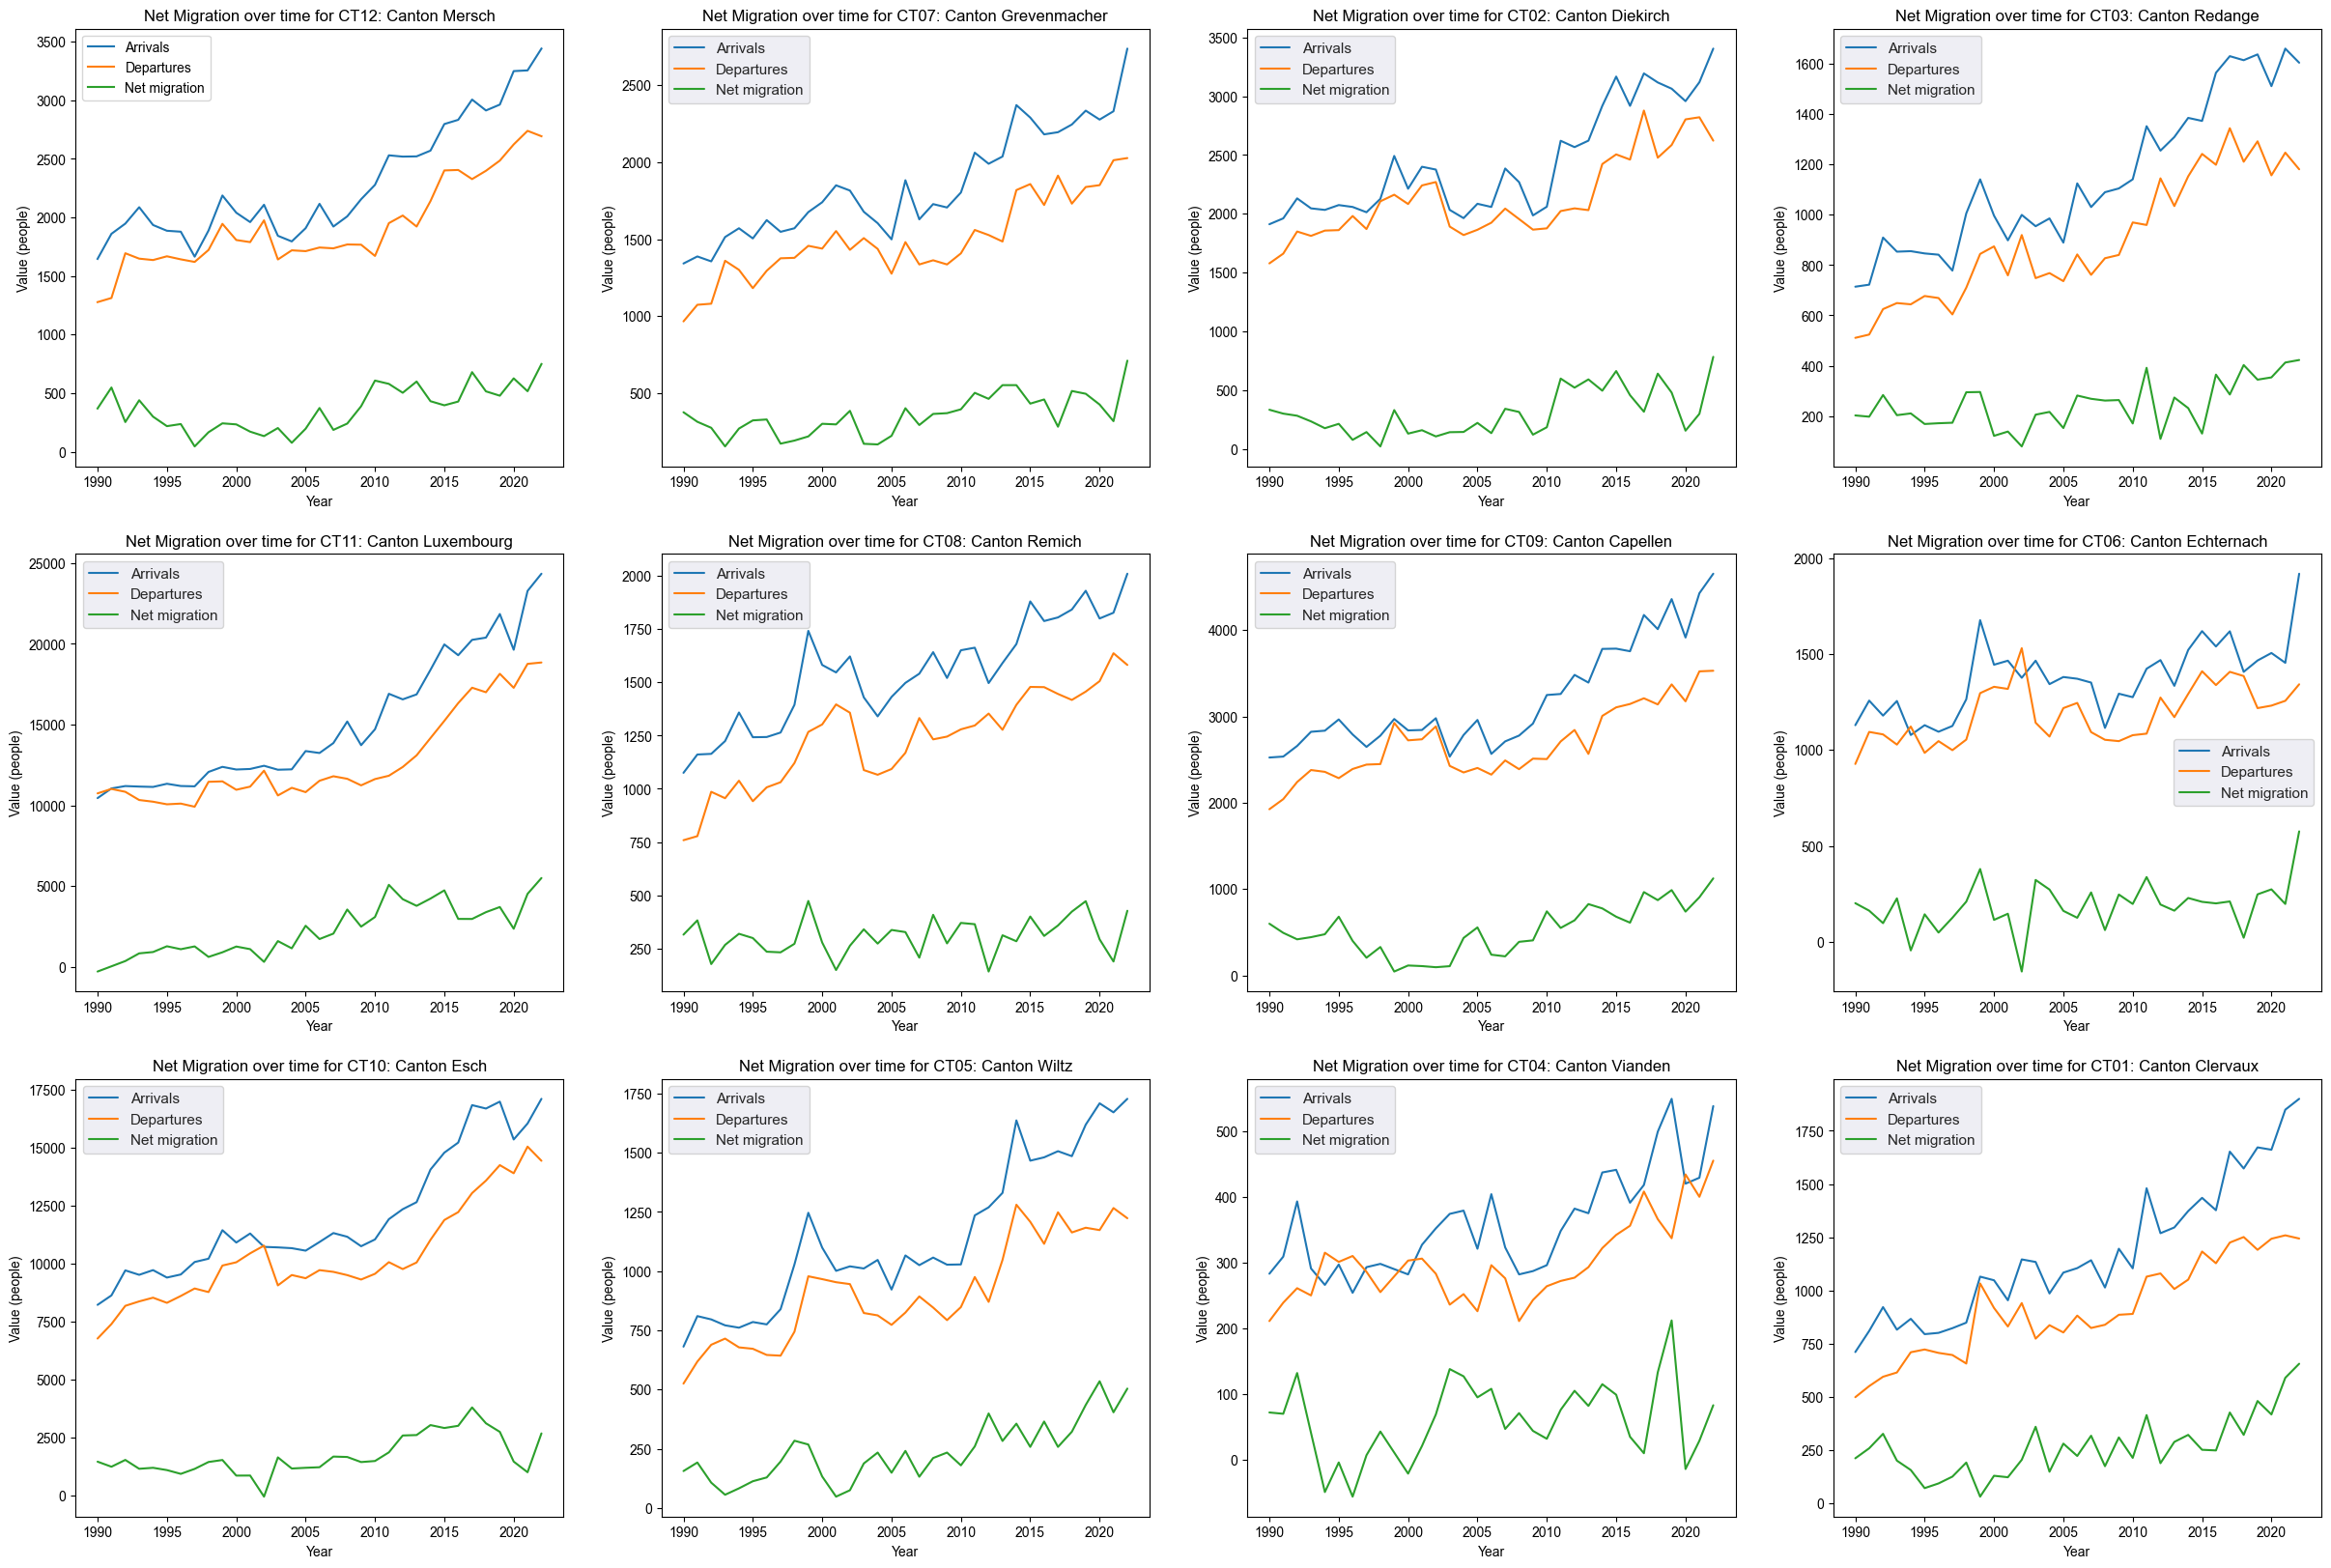

In [6]:
# Plot the net migration over time for all cantons in Luxembourg
luxembourg_cantons = migration_df[migration_df["location"].str.startswith("CT")]

# 3x4 grid of plots
fig, axes = plt.subplots(3, 4, figsize=(30, 20))
axes = axes.flatten()

for i, canton in enumerate(luxembourg_cantons["location"].unique()):
    ax = axes[i]
    for label in sorted(luxembourg_cantons["type"].unique()):
        sns.lineplot(data=luxembourg_cantons[(luxembourg_cantons["location"] == canton)
                                             & (luxembourg_cantons["type"] == label)],
                     x="year",
                     y="value",
                     label=label.split(": ")[1],
                     ax=ax)
    sns.set_theme(style="darkgrid", palette="colorblind")
    ax.set_title(f"Net Migration over time for {canton}")
    ax.set_xlabel("Year")
    ax.set_ylabel("Value (people)")

plt.show()


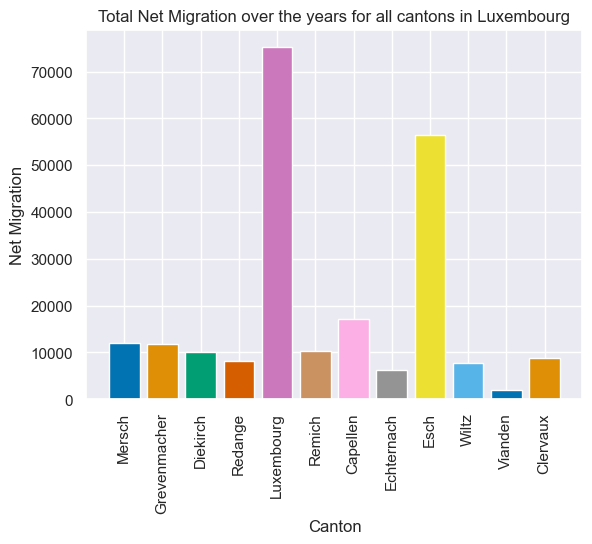

In [7]:
# Plot the net migration over time for all cantons in a single bar chart
# i.e. we have a bar for each canton, and each bar has 1 value that represents the total net migration for that canton over all years
for canton in luxembourg_cantons["location"].unique():
    canton_migration = luxembourg_cantons[(luxembourg_cantons["location"] == canton)
                                          & (luxembourg_cantons["type"] == "M003: Net migration")]
    total_migration = canton_migration.groupby("location")["value"].sum()
    # print(total_migration)
    plt.bar(canton.split("Canton ")[1], total_migration.values[0])

plt.title("Total Net Migration over the years for all cantons in Luxembourg")
plt.xlabel("Canton")
plt.ylabel("Net Migration")
# X axis labels are too long, so we rotate them
plt.xticks(rotation=90)
# The scale in the y-axis is in scientific notation, so we change it to normal notation
plt.ticklabel_format(style='plain', axis='y')
plt.show()
